In [1]:
import pandas as pd
import numpy as np


In [2]:
url_data = (r"https://raw.githubusercontent.com/conversationai/unhealthy-conversations/main/unhealthy_full.csv")

data_csv = pd.read_csv(url_data)

In [3]:
data_csv.head()

,_unit_id,comment,_trust,_worker_id,antagonize,condescending,dismissive,generalisation,generalisation_unfair,healthy,hostile,sarcastic
0,2028122383,"Moon, Do you *really* need it spelled out to you?",0.9333,44856405,0,0,0,0,0.0,1,0,0
1,2327208388,"It means you can ask the values questions, but...",0.9348,45322411,0,0,0,1,1.0,0,0,0
2,1812167562,To you perhaps.,0.9929,44126774,0,0,0,0,0.0,1,0,0
3,2319155917,"I don't want to put words in your mouth, but a...",0.9778,45178195,0,0,0,0,0.0,1,0,0
4,1812168807,perhaps this is not a problem seeing as how ev...,0.9145,44619566,0,0,0,0,0.0,0,0,0


In [4]:
data_csv.shape

(227975, 12)

In [5]:
data_csv.info

<bound method DataFrame.info of           _unit_id                                            comment  _trust  \
0       2028122383  Moon, Do you *really* need it spelled out to you?  0.9333   
1       2327208388  It means you can ask the values questions, but...  0.9348   
2       1812167562                                    To you perhaps.  0.9929   
3       2319155917  I don't want to put words in your mouth, but a...  0.9778   
4       1812168807  perhaps this is not a problem seeing as how ev...  0.9145   
...            ...                                                ...     ...   
227970  1739450093  In 2001 the price of oil was around $25 a barr...  0.9071   
227971  1739449742  How about answering the question asked rather ...  0.8908   
227972  1739443029  Re: 'he is not a war mugger' [sic]You seem to ...  0.9716   
227973  1812168293  At last someone trotting out facts instead of ...  0.8409   
227974  1739467981  why should I care what the catholic dinosaurs ...  0.9000

In [6]:
data_csv.describe

<bound method NDFrame.describe of           _unit_id                                            comment  _trust  \
0       2028122383  Moon, Do you *really* need it spelled out to you?  0.9333   
1       2327208388  It means you can ask the values questions, but...  0.9348   
2       1812167562                                    To you perhaps.  0.9929   
3       2319155917  I don't want to put words in your mouth, but a...  0.9778   
4       1812168807  perhaps this is not a problem seeing as how ev...  0.9145   
...            ...                                                ...     ...   
227970  1739450093  In 2001 the price of oil was around $25 a barr...  0.9071   
227971  1739449742  How about answering the question asked rather ...  0.8908   
227972  1739443029  Re: 'he is not a war mugger' [sic]You seem to ...  0.9716   
227973  1812168293  At last someone trotting out facts instead of ...  0.8409   
227974  1739467981  why should I care what the catholic dinosaurs ...  0.90

In [7]:
data_csv.isna()

,_unit_id,comment,_trust,_worker_id,antagonize,condescending,dismissive,generalisation,generalisation_unfair,healthy,hostile,sarcastic
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
227970,False,False,False,False,False,False,False,False,False,False,False,False
227971,False,False,False,False,False,False,False,False,False,False,False,False
227972,False,False,False,False,False,False,False,False,False,False,False,False
227973,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
data_csv.isna().any()

_unit_id                 False
comment                   True
_trust                   False
_worker_id               False
antagonize               False
condescending            False
dismissive               False
generalisation           False
generalisation_unfair    False
healthy                  False
hostile                  False
sarcastic                False
dtype: bool

In [9]:
data_csv_drop=data_csv.drop_duplicates(subset="comment")

In [10]:
data_csv["comment"]

0         Moon, Do you *really* need it spelled out to you?
1         It means you can ask the values questions, but...
2                                           To you perhaps.
3         I don't want to put words in your mouth, but a...
4         perhaps this is not a problem seeing as how ev...
                                ...                        
227970    In 2001 the price of oil was around $25 a barr...
227971    How about answering the question asked rather ...
227972    Re: 'he is not a war mugger' [sic]You seem to ...
227973    At last someone trotting out facts instead of ...
227974    why should I care what the catholic dinosaurs ...
Name: comment, Length: 227975, dtype: object

In [11]:
data_csv_drop.shape

(44355, 12)

In [12]:
data_wnull= data_csv_drop.dropna()
data_wnull.shape

(44354, 12)

In [13]:
from sklearn.model_selection import train_test_split
data_train, data_test= train_test_split(data_wnull, test_size=0.5, random_state=42)
print(data_train.shape, data_test.shape)

(22177, 12) (22177, 12)


In [14]:
import nltk

nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

In [15]:
from tables.file import defaultdict
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))
d=defaultdict(int)

defaultdict(<class 'int'>, {'you': 11469, 'it': 7588, 'out': 1986, 'to': 21816, 'can': 2165, 'the': 38320, 'but': 2831, 'be': 5921, 'what': 2942, 'do': 3075, 'we': 2670, 'while': 380, 'is': 15506, 'a': 17754, 'of': 17354, "don't": 2233, 'in': 11457, 'your': 3945, 'are': 7470, 'this': 4386, 'not': 6374, 'as': 3924, 'how': 1498, 'up': 1985, 'have': 5624, 'an': 2543, 'who': 2640, 'he': 2582, 'his': 2086, 'these': 734, 'with': 4980, 'and': 15852, 'were': 1173, 'at': 2463, 'when': 1558, 'they': 3797, 'themselves': 280, 'their': 2453, 'if': 2112, 'some': 1158, 'against': 474, 'from': 2847, 'being': 1014, 'on': 5444, 'has': 2995, 'no': 2284, 'that': 10496, "wasn't": 176, 'about': 3123, 'for': 8233, 'was': 3495, "you've": 133, 'there': 1713, 'under': 396, 'most': 846, "doesn't": 757, 'does': 1081, 'more': 2336, 'whom': 64, 'will': 3222, 'such': 529, 'or': 2851, 'himself': 150, 'both': 370, 'same': 934, "you're": 597, 'again': 513, 'after': 513, 'so': 2370, 'should': 2042, 'me': 1156, 'now': 10

<BarContainer object of 15 artists>

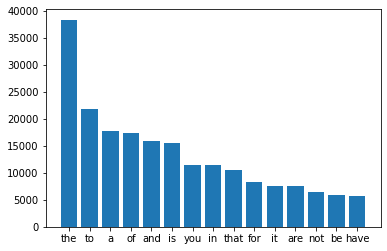

In [16]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()
for i in data_csv_drop["comment"]:
    i=tokenizer.tokenize(str(i))
    for j in i:
      if j in stop_words:
        d[j]+=1
print(d)        
wordcount=sorted(d.items(),key=lambda x:x[1],reverse=True)[:15]    
x,y=zip(*wordcount)
plt.bar(x,y)   

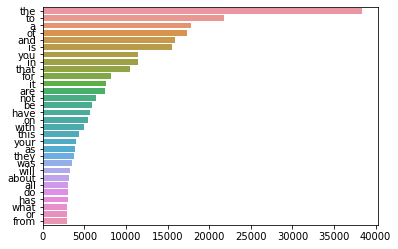

In [17]:
import collections
import seaborn as sns
counter=collections.Counter(d)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:30]:
  if (word in stop_words):
    x.append(word)
    y.append(count)
sns.barplot(x=y,y=x)

In [18]:
import pandas as pd
import numpy as np
import string
import os
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

embed_size = 300
max_features = 20000 
maxlen = 200 

print('Loading data...')

classes = ["sarcastic", "healthy", "antagonize", "condescending", "dismissive", "hostile"]
y = data_train[classes].values
y_test = data_test[classes].values

train_sentences = data_train["comment"]
test_sentences = data_test["comment"]

print('Preprocessing train') 
train = list()
for i in train_sentences:
    tokenizer = RegexpTokenizer(r'\w+')#removing punctuations
    train.append([i.lower() for i in (tokenizer.tokenize(str(i))) if i not in stop_words])

print('Preprocessing test')
test = list()
for i in test_sentences:
    tokenizer = RegexpTokenizer(r'\w+')#removing punctuations
    test.append([i.lower() for i in (tokenizer.tokenize(str(i))) if i not in stop_words])

train[:5]

Loading data...
Preprocessing train
Preprocessing test


[['i', 'ericka', 'ignore', 'she', 'total', 'waste', 'electrons'],
 ['not', 'cake', 'pizza', 'get', 'right'],
 ['they', 'get', 'bed', 'noon'],
 ['stand',
  'firm',
  'prime',
  'minister',
  'harper',
  'give',
  'welfare',
  'blackmail',
  'throwing',
  'money',
  'worked',
  'past',
  'support',
  'corruption'],
 ['the',
  'ndp',
  'going',
  'win',
  'i',
  'hope',
  'put',
  'house',
  'market',
  'may',
  '15th',
  'bye',
  'bye',
  '4',
  'years',
  'least',
  'perhaps',
  'longer']]

In [19]:
# 1. create custom embeddings 
words = list()
for i in train_sentences:
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(i) # word tokenizacia
    words.append(tokens) # pridá výsledné slová do prázdneho listu, ktorý sme na začiatku vytvorili
print('Word2Vec...')
print(words[:10])

Word2Vec...
[['I', 'have', 'Ericka', 'on', 'ignore', 'She', 'is', 'a', 'total', 'waste', 'of', 'electrons'], ['Not', 'cake', 'Pizza', 'Get', 'it', 'right'], ['They', 'don', 't', 'get', 'out', 'of', 'bed', 'before', 'noon'], ['Stand', 'firm', 'Prime', 'Minister', 'Harper', 'don', 't', 'give', 'in', 'to', 'this', 'welfare', 'blackmail', 'throwing', 'money', 'at', 'this', 'has', 'not', 'worked', 'in', 'the', 'past', 'only', 'support', 'the', 'corruption', 'there'], ['The', 'NDP', 'is', 'going', 'to', 'win', 'so', 'I', 'hope', 'you', 'put', 'your', 'house', 'on', 'the', 'market', 'on', 'May', '15th', 'bye', 'bye', 'for', '4', 'years', 'at', 'least', 'and', 'perhaps', 'longer'], ['It', 'must', 'really', 'make', 'you', 'Cons', 'proud', 'when', 'after', 'being', 'unable', 'for', 'decades', 'to', 'grasp', 'the', 'concept', 'of', 'multiculturalism', 'you', 'stumble', 'across', 'the', 'crassest', 'possible', 'version', 'of', 'it', 'and', 'run', 'with', 'it', 'to', 'extremes'], ['You', 'get', 'to

In [20]:
from gensim.models import Word2Vec
from keras.layers import Embedding

model = Word2Vec(words, min_count = 1, size = 300) #word to vector, implementacia z kniznice gensim
vocabulary = model.wv.vocab #slovnik
name = 'w2vPP.txt'
model.wv.save_word2vec_format(name, binary = False)

EMBEDDING_FILE = 'w2vPP.txt' 

In [21]:
import tensorflow
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Input, Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D, BatchNormalization, SpatialDropout1D, GlobalAveragePooling1D, concatenate, Activation, LSTM, Bidirectional
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, multilabel_confusion_matrix

In [22]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(train_sentences))

tokenized_train_sentences = tokenizer.texts_to_sequences(train)
tokenized_test_sentences = tokenizer.texts_to_sequences(test)

train_padding = pad_sequences(tokenized_train_sentences, maxlen)
test_padding = pad_sequences(tokenized_test_sentences, maxlen)

def get_coefs(word, *arr): return word, np.asarray(arr, dtype='float32')
embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))

print(list(embeddings_index.items())[:5])

[('30081', array([300.], dtype=float32)), ('the', array([-3.78899992e-01, -7.17111230e-01,  3.31623793e-01, -1.10525377e-01,
        3.22022229e-01,  1.28863752e-01,  1.83253348e-01, -2.15110809e-01,
       -7.68772602e-01,  5.33646755e-02, -7.01583445e-01, -5.74193835e-01,
        4.69925791e-01,  1.81132972e-01, -4.11200300e-02, -6.14199042e-01,
       -7.80025423e-02, -5.18885255e-01,  1.47460982e-01,  1.46978013e-02,
       -3.10844928e-01,  1.10163224e+00,  9.80180427e-02, -2.15881288e-01,
        2.60331094e-01,  5.11384249e-01,  3.86951536e-01, -9.67196226e-02,
        1.81377098e-01, -8.63700867e-01, -3.20828557e-01,  5.58661580e-01,
       -7.89983347e-02,  3.72787595e-01,  2.44745716e-01, -9.04668197e-02,
       -3.27450246e-01, -2.86091566e-01, -5.64209186e-03,  3.29528362e-01,
       -6.48283541e-01, -3.51192355e-02,  1.80912137e-01, -2.15328544e-01,
        2.10701525e-01, -3.13358158e-01,  1.13755953e+00,  1.68508485e-01,
       -2.49814522e-03,  3.80691379e-01,  2.228329

In [23]:
len(embeddings_index.get('society'))

300

In [24]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix[:5]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.37889999, -0.71711123,  0.33162379, ...,  0.44478926,
         0.28268355, -0.38547325],
       [-0.77622753, -0.73679912,  0.21458223, ...,  0.2954427 ,
         0.06378547, -0.18754593],
       [-0.83340555, -0.63952178,  0.34328109, ...,  0.09216378,
         0.40524474, -0.0687547 ],
       [-0.44995633, -0.65132201,  0.46993828, ...,  0.18409519,
        -0.01396127, -0.13326971]])

In [25]:
embedding_matrix.shape

(20000, 300)

In [26]:
kfold = KFold(n_splits=3)
cvscores = []
accscores = []
rocscores = []

for train, test in kfold.split(train_padding, y):
    
    inputs = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inputs)
    x = SpatialDropout1D(0.2)(x)
    x = LSTM(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(x)
    x = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(x)
    avg_pool = GlobalAveragePooling1D()(x)
    max_pool = GlobalMaxPooling1D()(x)
    x = concatenate([avg_pool, max_pool])
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    output = Dense(6, activation='sigmoid')(x)
    model = Model(inputs=inputs, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())

    saved_model = "w2vPP.hdf5"
    checkpoint = ModelCheckpoint(saved_model, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

    print('Training model...')
    history = model.fit(train_padding, y, batch_size=32, epochs=4, callbacks=[checkpoint], validation_split=0.1)

    scores = model.evaluate(train_padding[test], y[test])
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

    print("Loading model....")
    model = load_model('w2vPP.hdf5')
    y_pred = model.predict(test_padding)

    y_int = np.zeros_like(y_pred)
    y_int[y_pred > 0.5] = 1

    accuracy = accuracy_score(y_test,y_int)
    print('Accuracy is {}'.format(accuracy))
    accscores.append(accuracy)
    
    rocauc = roc_auc_score(y_test, y_pred)
    print('Roc-auc score is {}'.format(rocauc))
    rocscores.append(rocauc)
    
    print('Classification report {}'.format(classification_report(y_test, y_int, zero_division=0)))
    print('Confusion matrix {}'.format(multilabel_confusion_matrix(y_test, y_int)))
        
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))
print("Test accuracy is: {} %.2f (+/- %.2f)" %  (np.mean(accscores), np.std(accscores)))
print("Test roc-auc is: {} %.2f (+/- %.2f)" % (np.mean(rocscores), np.std(rocscores)))

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 200, 300)     6000000     ['input_1[0][0]']                
                                                                                                  
 spatial_dropout1d (SpatialDrop  (None, 200, 300)    0           ['embedding[0][0]']              
 out1D)                                                                                           
                                                                                                  
 lstm (LSTM)                    (None, 200, 128)     219648      ['spatial_dropout1d[0][0]']  